In [14]:
#reload
df = pd.read_excel("wolves_passing_matchlogs.xlsx")
df.head()
# print(df.columns.tolist())

,Date,Result,GF,GA,Opponent,Opponent Third,PrgP,TotDist,PrgDist,Tier,Ahead,Level,Behind
0,2024-08-17,L,0,2,Arsenal,39,24,5925,2051,Top 6,0.0,25.0,65.0
1,2024-08-25,L,2,6,Chelsea,18,27,4598,1668,Top 6,0.0,23.0,72.0
2,2024-08-31,D,1,1,Nott'ham Forest,22,21,5227,1962,Bottom 14,0.0,88.0,2.0
3,2024-09-15,L,1,2,Newcastle Utd,32,31,7281,2506,Top 6,39.0,41.0,10.0
4,2024-09-21,L,1,3,Aston Villa,15,16,6273,1902,Top 6,48.0,40.0,6.0


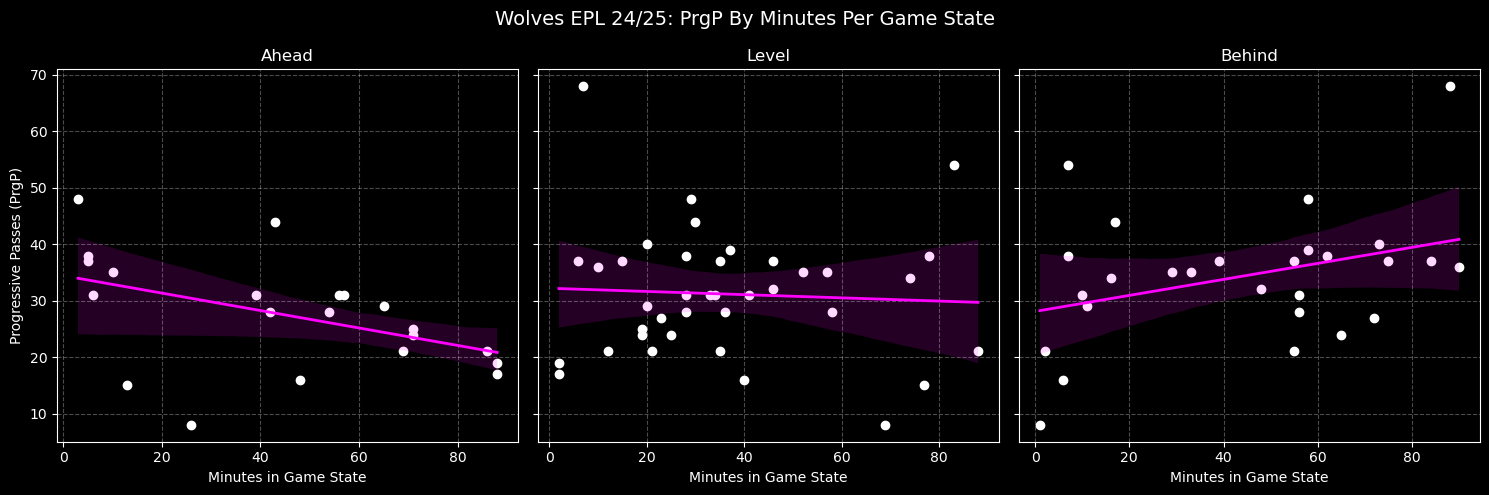

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "wolves_passing_matchlogs.xlsx"
df = pd.read_excel(file_path, sheet_name="wolves_passing_matchlogs")

df_melted = df.melt(
    id_vars=["Date", "Opponent", "PrgP"],
    value_vars=["Ahead", "Level", "Behind"],
    var_name="Game State",
    value_name="Minutes"
)

df_melted = df_melted[df_melted["Minutes"] > 0]

plt.style.use("dark_background")

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
states = ["Ahead", "Level", "Behind"]

for ax, state in zip(axes, states):
    subset = df_melted[df_melted["Game State"] == state]
    sns.regplot(
        data=subset,
        x="Minutes",
        y="PrgP",
        order=1,
        scatter_kws={"alpha": 1, "color": "white"},
        line_kws={"color": "magenta", "linewidth": 2},
        ax=ax
    )
    
    ax.set_title(f"{state}", fontsize=12, color="white")
    ax.set_xlabel("Minutes in Game State", fontsize=10, color="white")
    if state == "Ahead":
        ax.set_ylabel("Progressive Passes (PrgP)", fontsize=10, color="white")
    else:
        ax.set_ylabel("")
    
    ax.grid(True, linestyle="--", alpha=0.3)
    ax.tick_params(colors="white")

fig.suptitle("Wolves EPL 24/25: PrgP By Minutes Per Game State", fontsize=14, color="white")
plt.tight_layout()
plt.show()


/var/folders/qd/zmwxbd7j74dc0tnmftc7mnhm0000gn/T/ipykernel_42326/3705356091.py:9: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df["Dominant State"] = df[["Ahead", "Level", "Behind"]].idxmax(axis=1)
/var/folders/qd/zmwxbd7j74dc0tnmftc7mnhm0000gn/T/ipykernel_42326/3705356091.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


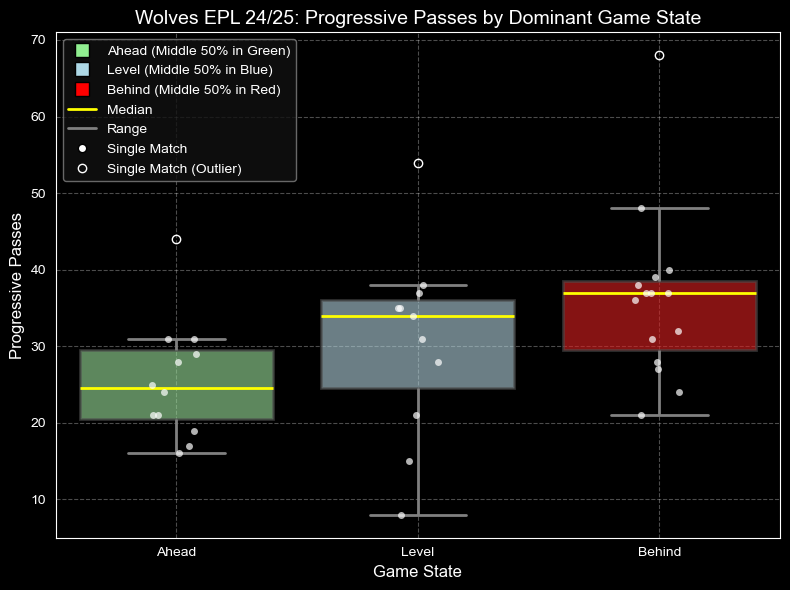

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

file_path = "wolves_passing_matchlogs.xlsx"
df = pd.read_excel(file_path, sheet_name="wolves_passing_matchlogs")

df["Dominant State"] = df[["Ahead", "Level", "Behind"]].idxmax(axis=1)

def remove_outliers(data, col):
    filtered = []
    for state, group in data.groupby("Dominant State"):
        Q1 = group[col].quantile(0.25)
        Q3 = group[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered.append(group[(group[col] >= lower) & (group[col] <= upper)])
    return pd.concat(filtered)

df_no_outliers = remove_outliers(df, "PrgP")

plt.style.use('dark_background')

color_map = {
    "Ahead": "lightgreen",
    "Level": "lightblue",
    "Behind": "red"
}

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="Dominant State",
    y="PrgP",
    order=["Ahead", "Level", "Behind"],
    palette=color_map,
    boxprops=dict(alpha=0.6, linewidth=2),
    whiskerprops=dict(color='gray', linewidth=2),
    capprops=dict(color='gray', linewidth=2),
    medianprops=dict(color='yellow', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='none', markeredgecolor='white', markersize=6, linestyle='none')
)
sns.stripplot(
    data=df_no_outliers,
    x="Dominant State",
    y="PrgP",
    order=["Ahead", "Level", "Behind"],
    color="white",
    alpha=0.7,
    jitter=True
)

ax.set_title("Wolves EPL 24/25: Progressive Passes by Dominant Game State", fontsize=14, color='white')
ax.set_xlabel("Game State", fontsize=12, color='white')
ax.set_ylabel("Progressive Passes", fontsize=12, color='white')
ax.grid(True, linestyle='--', alpha=0.3)
ax.tick_params(colors='white')

custom_legend = [
    Line2D([0], [0], marker='s', color='none', label='Ahead (Middle 50% in Green)', markerfacecolor='lightgreen', markersize=10),
    Line2D([0], [0], marker='s', color='none', label='Level (Middle 50% in Blue)', markerfacecolor='lightblue', markersize=10),
    Line2D([0], [0], marker='s', color='none', label='Behind (Middle 50% in Red)', markerfacecolor='red', markersize=10),
    Line2D([0], [0], color='yellow', linewidth=2, label='Median'),
    Line2D([0], [0], color='gray', linewidth=2, label='Range'),
    Line2D([0], [0], marker='o', color='none', markerfacecolor='white', label='Single Match', markersize=6),
    Line2D([0], [0], marker='o', color='white', markerfacecolor='none', linestyle='None', label='Single Match (Outlier)', markersize=6)]
legend = ax.legend(handles=custom_legend, facecolor='#111111', edgecolor='gray')
plt.setp(legend.get_texts(), color='white')

plt.tight_layout()
plt.show()
